In [9]:
#Usando los datos de sklearn

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris=load_iris()

muestras, caracteristicas = iris.data.shape
print (muestras)
print (caracteristicas)
list(iris.target_names)

150
4


['setosa', 'versicolor', 'virginica']

Implica que hay 150 muestras con 4 características de iris y además 3 categorías, que son los datos de salida

In [12]:
X=iris.data
acp=PCA(n_components=2, whiten=True).fit(X) #reducir de 4 dimensiones a dos dimensiones
X_acp=acp.transform(X) #son datos normalizados

In [17]:
print(acp.components_) #son los vectores propios para definir los planos

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Un objetivo del ACP es preservar la varianza lo máximo posible

In [23]:
#Varianza preservada por la primera dimensión y la segunda
print(acp.explained_variance_ratio_)

[0.92461872 0.05306648]


In [25]:
#Varianza junta preservada por las dos dimensiones
print(sum(acp.explained_variance_ratio_))

0.977685206318795


Se puede concluir que las 4 dimensiones no eran tan necesarias porque con 2 dimensiones se conservó el $97.7\%$ de la varianza.

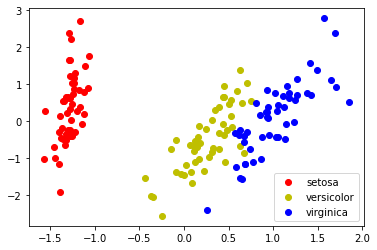

In [37]:
colors=cycle("ryb") #definir colores
objetivo_iris=range(len(iris.target_names)) #los datos de salida 
pl.figure()
for i,c, label in zip(objetivo_iris,colors,iris.target_names): #ordenar de acuerdo a las especies
    pl.scatter(X_acp[iris.target==i,0], X_acp[iris.target==i,1], #graficar de a una categoría
    c=c, label=label)
pl.legend()
pl.show()
#Y se tiene el objeto de 4 dimensiones proyectado en dos dimensiones    
    
    

Ahora reducir a una dimensión

In [39]:
X=iris.data
acp=PCA(n_components=1, whiten=False).fit(X) #reducir de 4 dimensiones a dos dimensiones
X_acp=acp.transform(X) #sin datos normalizados

In [41]:
print(acp.components_) #son los vectores propios para definir los planos

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [43]:
print(acp.explained_variance_ratio_)

[0.92461872]


Por lo que se conservó menos varianza. Ahora con datos normalizados:

In [49]:
X=iris.data
acp=PCA(n_components=1, whiten=True).fit(X) #reducir de 4 dimensiones a dos dimensiones
X_acp=acp.transform(X) #son datos normalizados

In [50]:
print(acp.components_) #son los vectores propios para definir los planos

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]]


In [52]:
print(acp.explained_variance_ratio_)

[0.92461872]


Por lo tanto, para esta reducción no hubo un cambio significativo usando datos normalizados.